# Intro to Pipelines and Pickles
> How to use transformers with sklearn's `cross_val_score` and export a machine learning model from a jupyter notebook.

<img src="https://www.polyeurope.com/site/images/home_slider/pig_animation.gif">

#### Motivations:

> We have learned how to train a machine learning model, and *we have discussed why we should never fit on our testing data*, but this becomes more complicated when we are using multiple fold cross validation ie breaking data into multiple splits. The solution for this is either a lot of manual code, or a pipeline.

>What if we wanted to deploy a model? **Currently,** our modeling process is broken up into a bunch of different code cells within a jupyter notebook, and there is no way for us to ask the model to make predictions on new data without opening the notebook, running the code to train the model, importing new data, and manually running code cells to make predictions. Google data scientists are not sitting at their computer running `shift + enter` for the thousands of data points they receive every second. So how to we use our models outside of a jupyter notebook? The solution to that is the `pickle` library.

<h3><u> Students will be able to </u></h3>

- Understand why pipelines are useful for model evaluation.
- Learn to construct a simple pipeline.
- Save a model or a pipeline as a `.pkl` file.

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Transformers
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Modeling Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Pipelines
from sklearn.pipeline import make_pipeline
import pickle

# Mock Data
from sklearn.datasets import load_breast_cancer
%matplotlib inline

## Let's review the modeling workflow we've seen so far...

In the cell below, we load the breast cancer dataset into a pandas dataframe:

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data['data'], columns = data['feature_names'])
df['target'] = data['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


>*This particular dataset is used mostly for demonstration purposes so there is no cleaning required.* ***Normally,*** *the next step would be for us to clean and format our data so it can then be modeled. Because the data is clean, we will skip this step.*

Next, we split our data into training and testing sets.

In [4]:
# Predictive Features
features = df.drop('target', axis = 1)
# Target Variable
target = df.target

# Create two sets of data. 
# One for training a model 
# One for predicting on unseen data
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=2020)

This is a classification dataset.

In [5]:
y_train.unique()

array([1, 0])

We will use Logistic Regression as our first model. Because Sklearn uses L2 regularization with Logistic Regression, we'll want to scale our data.

There are many ways to scale data. Today we will use sklearn's `StandardScaler`.

In [6]:
# Fit a scaler to our training data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

Next we instantiate a model.

In [7]:
model = LogisticRegression(random_state=2020)

Now we use cross validation to evaluate model performance.

In [8]:
cross_val_score(model, X_train_scaled, y_train, cv=3)

array([0.98591549, 0.95070423, 0.98591549])

After we have done this, we would likely make some alterations to the data or fit other models and compare each model's performance. But let's say that we decide this is our final model. The next thing we would do is test the model on our testing data.

To do this, we fit the model to all of our training data, and evaluate performance on the testing data. 

In [9]:
# Fit final model on all training data
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=2020)

In [10]:
# Score model
print('Training Accuracy: ', model.score(X_train_scaled, y_train))
print('Testing Accuracy: ', model.score(X_test, y_test))

Training Accuracy:  0.9882629107981221
Testing Accuracy:  0.42657342657342656


## What did we do wrong?

*YOUR ANSWER HERE*
1.  We didn't scale the testing data
2.  All training data was scaled before being passed into cross-validation

In [11]:
# Isolate features from target
features = df.drop('target', axis = 1)
target = df.target

# Train test splitdd
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=2020)

# Scale training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = features.columns)

# Fit model on training data
model = LogisticRegression(random_state=2020)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=2020)

Now if we want to use the model on testing data, *we have to transform the test data with the transformer that has been fit on the training data.*

In [12]:
X_test_scaled = scaler.transform(X_test)

Let's compare how the model performs on the unscaled and scaled testing data.

In [13]:
print('Unscaled ', model.score(X_test, y_test))
print('Scaled ', model.score(X_test_scaled, y_test))

Unscaled  0.42657342657342656
Scaled  0.9790209790209791


Then if we decide that this is our final model, we refit our transformer and model to all of our data, and save the scaler and model to disk using the `pickle` library.

In [14]:
# Fit to all of our data
scaler.fit(features)
X = scaler.transform(features)
model.fit(X, target)

LogisticRegression(random_state=2020)

In [15]:
# Save scaler
file = open('scaler.pkl', 'wb')
pickle.dump(scaler, file)
file.close()

In [16]:
# Save model
file = open('final_model.pkl', 'wb')
pickle.dump(model, file)
file.close()

**But, what if we wanted to use multiple fold cross validation.** If the correct way to scale data is to only fit the transformer on the training data, how do we use `cross_val_score`?

Under the hood, `cross_val_score` is making splits of the data we feed into the function, training on one split and making predictions on the other. For this to work with transformers, we would need to stick a transformer into the middle of that process. 

We could choose not to use `cross_val_score` but that puts us at risk of training or testing our model on a bad sample of data. After all, when we only use a single train test split there is a possibility that our split of the data, by random chance, happens to result in an unusually high or unusually low accuracy score. We don't want that. We want to report the most representative score for our model. 

Text(0.5, 0, 'Splits of the data')

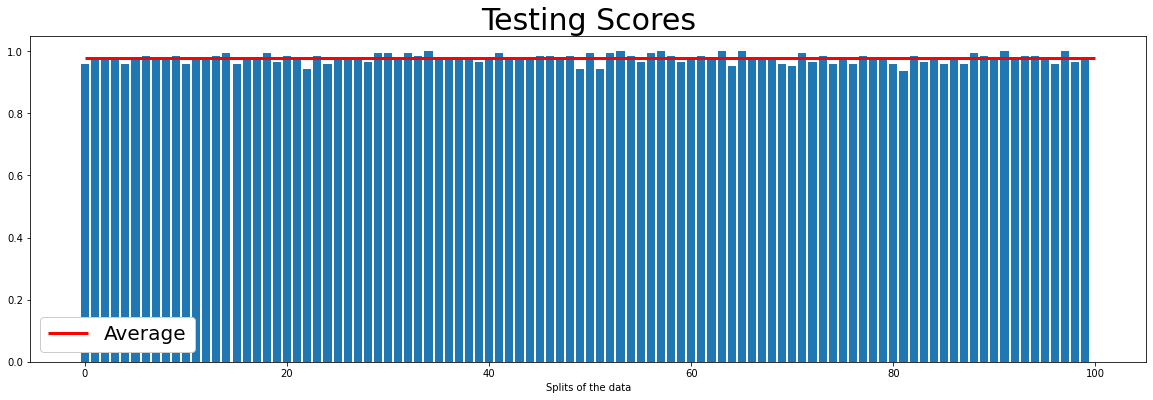

In [17]:
_test_scores = []
for i in range(100):
    _xtrain, _xtest, _ytrain, _ytest = train_test_split(features, 
                                                        target, 
                                                        random_state=i)
    _scaler = StandardScaler()
    _xtrain = _scaler.fit_transform(_xtrain)
    _xtest = _scaler.transform(_xtest)
    _model = LogisticRegression(random_state=2021)
    _model.fit(_xtrain, _ytrain)
    _test_score = _model.score(_xtest, _ytest)
    _test_scores.append(_test_score)

plt.figure(figsize=(20,6))   
plt.bar([x for x in range(len(_test_scores))], _test_scores)
plt.hlines(np.mean(_test_scores), 0, 100, 
           color='red', linewidth=3, label='Average')
plt.title('Testing Scores', size=30)
legend = plt.legend(loc='lower left', fontsize=20)
legend.get_frame().set_alpha(None)
plt.xlabel('Splits of the data')

<u>In summary we need to be able to do the following:</u>
1. Access splits made by sklearn's `cross_val_score`
2. Fit the desired Transformer on the training split
3. Transform the training data
4. Fit the desired model on the training data
5. Transform the testing data with the fit transformer <u>(Never fit on the testing data)</u>
6. Use our fit model to make predictions on the transformed testing data.

<img src="images/cross_validation.gif" width=1000>

# Introducing sklearn's pipeline

![](https://raw.githubusercontent.com/learn-co-students/pickles-and-pipelines-seattle-ds-012720/4817cebf95395b6f10ad882bf9daac528a0650dc/visuals/transformer.gif)


With a pipeline, this code...

```python
transformer.fit(X_train)
X_train_transformed = transformer.transform(X_train)
X_test_transformed = transformer.transform(X_test)
model.fit(X_train_transformed)
model.score(X_test_transformed)
```

...instead, looks like this:

```python
pipeline.fit(X_train)
pipeline.score(X_test)
```

#### Benefits of the Pipeline

- **Convenience and encapsulation**
    - You only have to call fit and predict once on your data to fit a whole sequence of estimators.
- **Joint parameter selection**
     - You can grid search over parameters of all objects in the pipeline at once.
- **Safety**
    - Pipelines help avoid leaking statistics from your test data into the trained model during cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

Let's create a Pipeline objects to do the following:
- Scale data using `StandardScaler`
- Fit a Logistic Regression model
- Score on the testing data

Sklearn makes this process very simple with their `make_pipeline` function. 

In [18]:
from sklearn.pipeline import make_pipeline
first_pipeline = make_pipeline(StandardScaler(), 
                         LogisticRegression(random_state=2021))
first_pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=2021))])

Now we can feed the pipeline into sklearn's `cross_val_score`!

In [19]:
scores = cross_val_score(first_pipeline, X_train, y_train, cv=5)
scores

array([0.97674419, 0.97647059, 0.94117647, 1.        , 1.        ])

And that's it! The nice thing about pipelines is that it allows us to create and easily access different modeling strategies! We can even feed pipelines into other pipelines!

In [20]:
preprocessing = make_pipeline(PolynomialFeatures(interaction_only=True), 
                              StandardScaler())

second_pipeline = make_pipeline(preprocessing, 
                              LogisticRegression(random_state=2021))                         

In [24]:
second_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(interaction_only=True)),
                                 ('standardscaler', StandardScaler())])),
                ('logisticregression', LogisticRegression(random_state=2021))])

In [21]:
cross_val_score(second_pipeline, X_train, y_train, cv=5)

array([0.97674419, 0.96470588, 0.92941176, 0.97647059, 1.        ])

In [22]:
first_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=2021))])

In [23]:
first_pipeline.score(X_test, y_test)

0.9790209790209791

# Pickling!

From the [documentation](https://docs.python.org/3/library/pickle.html):

>The pickle module implements binary protocols for serializing and de-serializing a Python object structure. “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy. Pickling (and unpickling) is alternatively known as “serialization”, “marshalling,” 1 or “flattening”; however, to avoid confusion, the terms used here are “pickling” and “unpickling”.



### How to save a machine learning model

1. Use python's built in `open` function to open a new file and save the opened file to a variable
    - This function receives:
        1. The name of the file you would like to open
        2. The mode in which you would like to open the file
            - For pickle the mode is `'wb'` which stands for "write binary".
            
2. Use `pickle.dump()` 
    - Feed into this function the object you would like to save (in this case, our model) and the variable in which we have saved the opened file. 
    
3. Close the opened file by calling `.close()` on the file object.

In [25]:
first_pipeline.fit(features, target)

file = open('models/final_pipeline.pkl', 'wb')
pickle.dump(first_pipeline, file)
file.close()

FileNotFoundError: [Errno 2] No such file or directory: 'models/final_pipeline.pkl'

### How to load a saved machine learning model

1. Use python's build in `open()` function to open the file and save the opened file to a variable.
    - Two things must be fed into this function:
        1. The path to the file
        2. The mode in which you would like to open the file. 
            - In this case, we will want to use `'rb'` which stands for "read binary".
            
2. Feed the opened file to `pickle.load()` to load in the model and save the loaded object to a variable


In [ ]:
file = open('models/final_pipeline.pkl', 'rb')
saved_model = pickle.load(file)
file.close()

In [ ]:
saved_model

## Extra Topic - Applying a transformer to a specific column in a pipelin

We can do this with sklearn's `make_column_transformer`.

Let's import some data below:

In [26]:
df = pd.read_csv('data/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Let's say we isolate the first two columns plus our targer. `age`  `workclass` and `income`

In [27]:
df_small = df[['age', 'workclass', 'income']]
df_small.head()

,age,workclass,income
0,25,Private,<=50K
1,38,Private,<=50K
2,28,Local-gov,>50K
3,44,Private,>50K
4,18,?,<=50K


If we wanted to *only* apply a OneHotEncoder to workclass we can use `make_column_tranformer`

In [28]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

`make_column_transformer` excepts tuples containing  a single transformer objects and a list of columns we would like to apply the transformation to. 

In [29]:
cat_transformer = make_column_transformer((OneHotEncoder(sparse=False), 
                                          ['workclass']), 
                                         remainder='passthrough')

In [30]:
cat_transformer.fit_transform(df_small)

array([[0.0, 0.0, 0.0, ..., 0.0, 25, '<=50K'],
       [0.0, 0.0, 0.0, ..., 0.0, 38, '<=50K'],
       [0.0, 0.0, 1.0, ..., 0.0, 28, '>50K'],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 58, '<=50K'],
       [0.0, 0.0, 0.0, ..., 0.0, 22, '<=50K'],
       [0.0, 0.0, 0.0, ..., 0.0, 52, '>50K']], dtype=object)

In [31]:
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()
df_small.income = target_encoder.fit_transform(df.income)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [33]:
df_small.head()

,age,workclass,income
0,25,Private,0
1,38,Private,0
2,28,Local-gov,1
3,44,Private,1
4,18,?,0


In [34]:
pipeline = make_pipeline(cat_transformer, LogisticRegression())

cross_val_score(pipeline, df_small.drop(columns='income'), df.income)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

array([0.75545092, 0.7528918 , 0.75593776, 0.75706388, 0.76095414])

In [35]:
cat_transformer.get_feature_names()

['onehotencoder__x0_?',
 'onehotencoder__x0_Federal-gov',
 'onehotencoder__x0_Local-gov',
 'onehotencoder__x0_Never-worked',
 'onehotencoder__x0_Private',
 'onehotencoder__x0_Self-emp-inc',
 'onehotencoder__x0_Self-emp-not-inc',
 'onehotencoder__x0_State-gov',
 'onehotencoder__x0_Without-pay',
 'age',
 'income']

## Applying custom transformers to columns with the same datatype

In [36]:
df_small = df[['age', 'workclass', 'gender', 'hours-per-week', 'income']]

In [37]:
from sklearn.compose import make_column_selector
number_selector = make_column_selector(dtype_include='number', dtype_exclude='object')
string_selector = make_column_selector(dtype_include='object')

In [38]:
preprocessing = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), string_selector),
                                        (StandardScaler(), number_selector),
                                       remainder='passthrough')


preprocessing.fit_transform(df_small.drop(columns='income'))

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.99512893, -0.03408696],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.04694151,  0.77292975],
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
        -0.77631645, -0.03408696],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.41180837, -0.03408696],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -1.21394141, -1.64812038],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.97418341, -0.03408696]])

In [ ]:
#__SOLUTION__
preprocessing = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), string_selector),
                                        (StandardScaler(), number_selector),
                                       remainder='passthrough')


preprocessing.fit_transform(df_small.drop(columns='income'))

In [39]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc7ca6dd490>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc7ca6dd880>)])

In [40]:
preprocessing.transformers

[('onehotencoder',
  OneHotEncoder(handle_unknown='ignore'),
  <sklearn.compose._column_transformer.make_column_selector at 0x7fc7ca6dd490>),
 ('standardscaler',
  StandardScaler(),
  <sklearn.compose._column_transformer.make_column_selector at 0x7fc7ca6dd880>)]

In [41]:
preprocessing.transformers_[0][1].get_feature_names()

array(['x0_?', 'x0_Federal-gov', 'x0_Local-gov', 'x0_Never-worked',
       'x0_Private', 'x0_Self-emp-inc', 'x0_Self-emp-not-inc',
       'x0_State-gov', 'x0_Without-pay', 'x1_Female', 'x1_Male'],
      dtype=object)

Now we can add our preprocessing pipeline to a pipeline with an estimator!

In [42]:
full_pipeline = make_pipeline(preprocessing, LogisticRegression())

cross_val_score(full_pipeline, df_small.drop(columns='income'), df_small.income)

array([0.76896305, 0.76589211, 0.76197789, 0.76699427, 0.76801802])

## Applying custom transformations

In [43]:
from sklearn.preprocessing import FunctionTransformer

In [44]:
def is_middle_age(x):
    if x < 45:
        return 0 
    elif x > 64:
        return 0
    else: 
        return 1
    
is_middle_age = np.vectorize(is_middle_age)

MiddleAgeTransformer = FunctionTransformer(is_middle_age)

In [45]:
def works_full_time(x):
    if x >= 40:
        return 1
    else:
        return 0
    
works_full_time = np.vectorize(works_full_time)

FullTimeTransformer = FunctionTransformer(works_full_time)

In [46]:
MiddleAgeTransformer.transform(df.age)

array([0, 0, 0, ..., 1, 0, 1])

In [47]:
FullTimeTransformer.transform(df['hours-per-week'])

array([1, 1, 1, ..., 1, 0, 1])

In [48]:
column_transformer = make_column_transformer((MiddleAgeTransformer, ['age']),
                                             (FullTimeTransformer, ['hours-per-week']),
                                             (OneHotEncoder(handle_unknown='ignore'), string_selector))

column_transformer.fit_transform(df_small)

array([[0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [1., 1., 0., ..., 0., 0., 1.]])

In [49]:
full_pipeline = make_pipeline(column_transformer, LogisticRegression())

In [50]:
cross_val_score(full_pipeline, df_small.drop(columns='income'), df.income)

array([0.7714198 , 0.76947487, 0.76689189, 0.77170352, 0.76822277])

### Extra Time - Assignment

Create a pipeline for the entire adult dataset!